Created on Tue Apr 16 15:16:18 2019

author: Centre for Environmental Data Analysis CEDA

# Python example for Climatic Research Unit (CRU) time-series (TS) 

## CRU TS data

This script provides two examples showing how to do some basic analysis and plotting of the
Climatic Research Unit Time Series (CRU-TS) v4.02 data obtained from the Centre from Environmental Data
Analysis CEDA. CRU TS 4.02 is high-resolution gridded data of month-by-month variation in climate from
Jan 1901 to Dec 2017.

The following script will analyse the whole time series, however this can be edited to
only produce custom plots for specific months/years/time periods.

This analysis is done using the `netCDF4`, `numpy` and `matplotlib` libraries other methods are available.

If you are unfamiliar with the CRU data please see:

1.  the CEDA catalogue record for this data: https://catalogue.ceda.ac.uk/uuid/3f8944800cc48e1cbc29a5ee12d8542d
2.  the CEDA CRU user guide: https://help.ceda.ac.uk/article/4472-cru-data-user-guide

* Further information on using `NetCDF` files: https://www.unidata.ucar.edu/software/netcdf/docs/user_guide.html
* Further information on using `Python`: https://www.python.org/
* Further information on using `Basemap`: https://matplotlib.org/basemap/

In [1]:
# Add the following useful modules which will help analyse the data
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from netCDF4 import Dataset

Read in the temperature data from the CEDA archive on JASMIN.
Change the filename if you have a local copy or want to use a different variable, version, etc.
Allocate to a variable "data".


In [2]:
print("Reading in the data from the netCDF file")
filename = "/media/xultaeculcis/2TB/datasets/cruts/original/cru_ts4.04.1901.2019.tmp.dat.nc"  # the location of the data
data = Dataset(filename)

Reading in the data from the netCDF file


If you read in NetCDF data and you don't know the names of the variables you can print out a list of variable names in the file using

`print(data.variables.keys())`

The `.keys()` method provides only the variable names, without this you will get additional metadata.
Each dimension in the file also has a variable, so you will see a variable for each dimension, in this case:
* 'lat' for latitudes
* 'lon' for longitudes
* 'time' for time
* 'tmp' for temperature

In [3]:
# Set the variable
print("Setting the variable from the data")
temp = data.variables["tmp"][:]  # for this example, temperature is selected

Setting the variable from the data


The temperature variable set above (temp) is a 3d array, where the first dimension
is time, second, is latitude and third is longitude.

In python, counting dimensions starts at 0. So time is axis 0 for the
temperature variable, latitude is the first axis and longitude is the second.

The `np.shape` function gives the number of elements in each dimension.

In [4]:
ntimes, nlat, nlon = np.shape(temp)
print(
    "The temp array has dimensions: \n"
    "Time (number of years x 12 months): {}\n"
    "Latitudes: {}\n"
    "Longitudes: {}".format(ntimes, nlat, nlon)
)

The temp array has dimensions: 
Time (number of years x 12 months): 1428
Latitudes: 360
Longitudes: 720


## Example 1: Plot an average over the whole time-series

In [5]:
# Calculate the average temperature for each grid point across all years in the dataset
print("Calculating the average across all years")
# average over the first dimension: time
temp_av_1901_2017 = np.mean(temp[:, :, :], axis=0)

Calculating the average across all years


This example plot is for a global plot.

To create a regional map, change the variables
`llcrnrlat`, `llcrnrlon`, `urcrnrlat`, `urcrnrlon` which are the lat/lon values of the
lower left and upper right corners of the map.

For help using `Basemap`, see the link in the beginning of this script

Plotting a global map


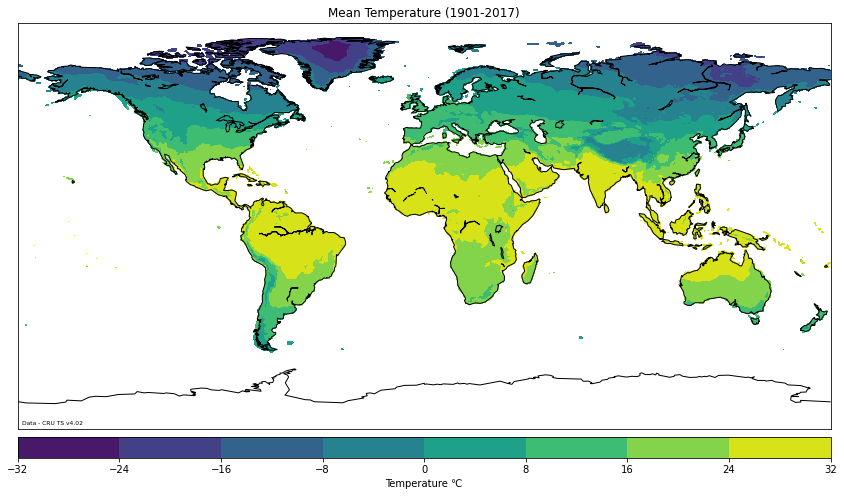

<Figure size 432x288 with 0 Axes>

In [6]:
print("Plotting a global map")
plt.figure(figsize=(15, 8))
map = Basemap(
    projection="cyl",
    resolution="c",
    llcrnrlat=-90,
    urcrnrlat=90,
    llcrnrlon=-180,
    urcrnrlon=180,
)  # set up the map using basemap
map.drawcoastlines(color="black")  # add coastlines
lons, lats = np.meshgrid(
    data.variables["lon"][:], data.variables["lat"][:]
)  # set the latitude and longitude variables from the data
x, y = map(lons, lats)
temp_plot = map.contourf(
    x, y, temp_av_1901_2017, cmap=plt.cm.viridis
)  # plot the temperature data on the map
cb = map.colorbar(
    temp_plot, "bottom", size="5%", pad="2%"
)  # plotting a colour bar scale
cb.set_label(u"Temperature \u2103")  # \u2103 is unicode for the symbol degrees Celcius
plt.title("Mean Temperature (1901-2017)")
plt.annotate("Data - CRU TS v4.02", (-178, -88), fontsize=6)
plt.show()  # show the map on screen
plt.savefig("cruts_global.png")  # save the figure with a user defined figure name

## Example 2: Plot a time series of global annual temperature anomalies

Calculating the global average
Calculating the annual average
Calculate the 1961-1990 average
Calculate the temperature anomaly compared to the 1961-1990 average
Plotting a time series graph


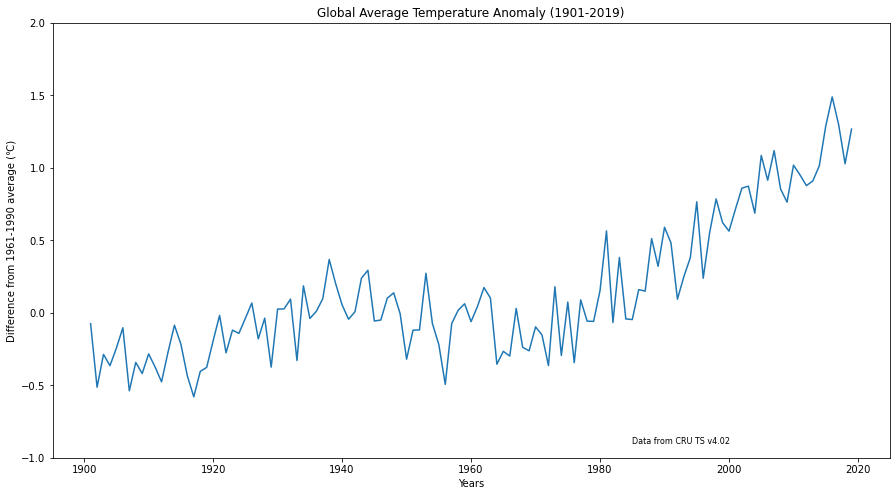

<Figure size 432x288 with 0 Axes>

In [7]:
# Average data across all grid points to create a global average time series.
# Axis 1 and 2 are latitude and longitude
print("Calculating the global average")
global_average = np.mean(temp[:, :, :], axis=(1, 2))

# Calculate the annual average required for each year of the time series to reduce seasonal noise
print("Calculating the annual average")
annual_temp = np.mean(
    np.reshape(global_average, (119, 12)), axis=1
)  # reshape the data into [119,12] as there are 119 years in the dataset,each with 12 months, then calculate the average for each year

# Calculate the 1961-1990 average
print("Calculate the 1961-1990 average")
# the annual temperature is sliced with the indices 60:89 to give the values from 1960 to 1990
av_1961_1990 = np.mean(annual_temp[60:89])

# Calculate the annual anomaly values compared to the 1961-1990 average
print("Calculate the temperature anomaly compared to the 1961-1990 average")
temp_anomaly = annual_temp - av_1961_1990

# Plot 2 - Timeseries
print("Plotting a time series graph")
plt.figure(figsize=(15, 8))
plt.plot(
    np.arange(1901, 2020, 1), temp_anomaly
)  # plot the temperature anomaly against years
plt.ylim(
    np.floor(min(temp_anomaly)), np.ceil(max(temp_anomaly))
)  # ensure all data fits visibly on graph
plt.title("Global Average Temperature Anomaly (1901-2019)")
plt.xlabel("Years")  # label for the x axis
plt.ylabel(u"Difference from 1961-1990 average (\u2103)")  # label for the y axis
plt.text(1985, -0.9, "Data from CRU TS v4.02", fontsize=8)
plt.show()  # show the graph on screen
plt.savefig("temp_anom_ts.png")  # save the figure with a user defined figure name